In [2]:
#Importing Neccesary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
# Load data
df = pd.read_csv("cumulative.csv")
df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [4]:
# Select required columns
selected_columns = [
    "koi_disposition", 
    "koi_score",
    "koi_fpflag_nt",
    "koi_fpflag_ss",
    "koi_fpflag_co",
    "koi_steff_err2",
    "koi_slogg",
    "koi_slogg_err1",
    "koi_slogg_err2",
    "koi_srad",
    "koi_srad_err1",
    "koi_srad_err2",
    "ra",
    "dec",
    "koi_kepmag"
]

In [5]:
df = df[selected_columns]

In [6]:
# Drop missing values
df = df.dropna()

In [7]:
# Keep only relevant classes
df = df[df["koi_disposition"].isin(["CONFIRMED", "FALSE POSITIVE"])]
# Encode target
df["koi_disposition"] = df["koi_disposition"].map({
    "CONFIRMED": 1,
    "FALSE POSITIVE": 0
})

In [8]:
# Split features & target
X = df.drop("koi_disposition", axis=1)
y = df["koi_disposition"]

In [9]:

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,stratify =y
)


In [10]:
# Handle missing values using training stats
median_vals = x_train.median()
x_train = x_train.fillna(median_vals)
x_test = x_test.fillna(median_vals)



In [11]:
# Feature scaling (This is important  for Logistic Regression)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [12]:
# Logistic Regression
logireg = LogisticRegression(max_iter=300)
logireg.fit(x_train_scaled, y_train)

y_pred_lr = logireg.predict(x_test_scaled)


In [13]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9934533551554828
[[767   1]
 [  7 447]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       768
           1       1.00      0.98      0.99       454

    accuracy                           0.99      1222
   macro avg       0.99      0.99      0.99      1222
weighted avg       0.99      0.99      0.99      1222



In [14]:
rf = RandomForestClassifier(
    n_estimators = 300,
    random_state = 42
)
rf.fit(x_train_scaled,y_train)
    

RandomForestClassifier(n_estimators=300, random_state=42)

In [15]:
rfpred = rf.predict(x_test)
acc=accuracy_score(y_test,rfpred)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [16]:
print(acc)

0.9893617021276596


In [17]:
print(confusion_matrix(y_test,rfpred))

[[763   5]
 [  8 446]]


In [18]:
print(classification_report(y_test,rfpred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       768
           1       0.99      0.98      0.99       454

    accuracy                           0.99      1222
   macro avg       0.99      0.99      0.99      1222
weighted avg       0.99      0.99      0.99      1222



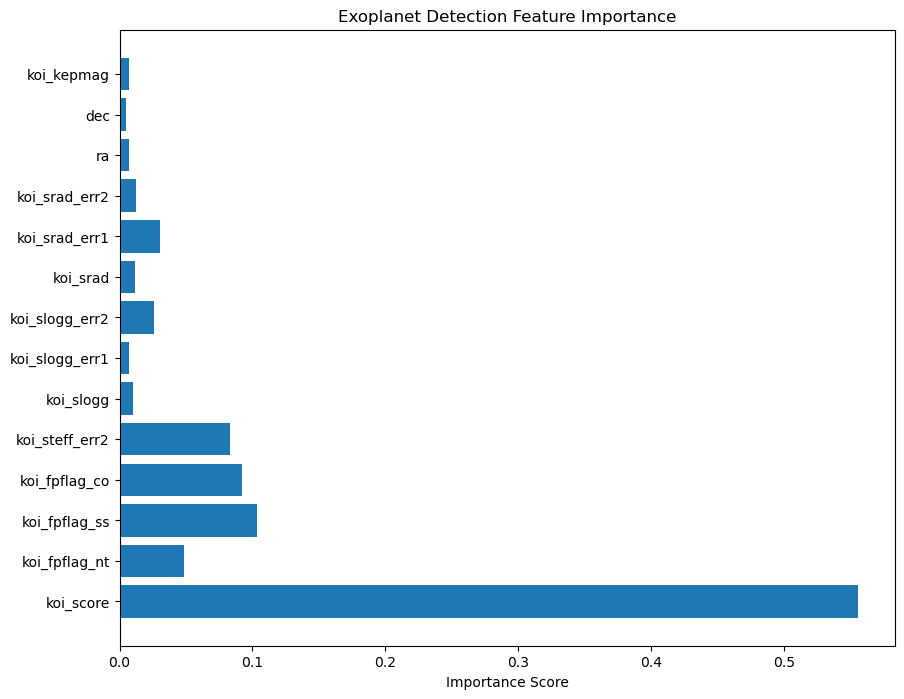

In [19]:
import matplotlib.pyplot as plt
importances = rf.feature_importances_
feat_names = X.columns
plt.figure(figsize=(10,8))
plt.barh(feat_names,importances)
plt.xlabel("Importance Score")
plt.title("Exoplanet Detection Feature Importance")
plt.show()